## 5-TransformacionesGeométricas

In [2]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import random

In [3]:
# Ruta general
base_dir = 'Coleccion/'

#Sub rutas Modelos
m1 = base_dir + 'Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Imagenes/'
m2 = base_dir + 'Anillo_compresion__Carga_Lineal_3200N__100_frames__256_Resolucion/Imagenes/'
m3 = base_dir + 'Placa_Infinita__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/'
m4 = base_dir + 'Viga_distribuida__Carga_Lineal_3000N__100_frames__256_Resolucion/Imagenes/'
m5 = base_dir + 'Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/Imagenes/'
m6 = base_dir + 'Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/'
m7 = base_dir + 'Mensula__Carga_Lineal_100000N__100_frames__256_Resolucion/Imagenes/'
m8 = base_dir + 'Muesca__Carga_Lineal_3000000N__100_frames__256_Resolucion/Imagenes/'

#Sub rutas Phase
disco = base_dir + 'Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Phase/'
anillo = base_dir + 'Anillo_compresion__Carga_Lineal_3200N__100_frames__256_Resolucion/Phase/'
placa = base_dir + 'Placa_Infinita__Carga_Lineal_7000N__100_frames__256_Resolucion/Phase/'
vd = base_dir + 'Viga_distribuida__Carga_Lineal_3000N__100_frames__256_Resolucion/Phase/'
vp = base_dir + 'Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/Phase/'
vertical = base_dir + 'Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Phase/'
mensula = base_dir +  'Mensula__Carga_Lineal_100000N__100_frames__256_Resolucion/Phase/'
muesca = base_dir + 'Muesca__Carga_Lineal_3000000N__100_frames__256_Resolucion/Phase/'

# Sub Rutas iluminacion + camara
c = ['Concord_IMX250MYR_No_correccion/',
 'Concord_IMX250MZR_No_correccion/',
 'DL11_IMX250MYR_No_correccion/',
 'DL11_IMX250MZR_No_correccion/',
 'Fluorescente_IMX250MYR_No_correccion/',
 'Fluorescente_IMX250MZR_No_correccion/',
 'LCD_IMX250MYR_No_correccion/',
 'LCD_IMX250MZR_No_correccion/',
 'Philips_IMX250MYR_No_correccion/',
 'Philips_IMX250MZR_No_correccion/',
 'RXD2_IMX250MYR_No_correccion/',
 'RXD2_IMX250MZR_No_correccion/',
 'Sylvania_IMX250MYR_No_correccion/',
 'Sylvania_IMX250MZR_No_correccion/',
 'Toshiba_IMX250MYR_No_correccion/',
 'Toshiba_IMX250MZR_No_correccion/',
 'Willard_IMX250MYR_No_correccion/',
 'Willard_IMX250MZR_No_correccion/']

cs = ['3', '4', '10', '11', '17', '18', '24', '25', '31', '32', '38', '39', '45', '46', '52', '53', '59', '60']

#Sub rutas Phase Matrix Normalized Augmented
discon = base_dir + 'Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/PNA1/'
anillon = base_dir + 'Anillo_compresion__Carga_Lineal_3200N__100_frames__256_Resolucion/PNA2/'
placan = base_dir + 'Placa_Infinita__Carga_Lineal_7000N__100_frames__256_Resolucion/PNA3/'
vdn = base_dir + 'Viga_distribuida__Carga_Lineal_3000N__100_frames__256_Resolucion/PNA4/'
vpn = base_dir + 'Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/PNA5/'
verticaln = base_dir + 'Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/PNA6/'
mensulan = base_dir + 'Mensula__Carga_Lineal_100000N__100_frames__256_Resolucion/PNA7/'
muescan = base_dir + 'Muesca__Carga_Lineal_3000000N__100_frames__256_Resolucion/PNA8/'

#Sub rutas Phase Matrix MinMax
discoma = base_dir + 'Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/PMinMax1/'
anilloma = base_dir + 'Anillo_compresion__Carga_Lineal_3200N__100_frames__256_Resolucion/PMinMax2/'
placama = base_dir + 'Placa_Infinita__Carga_Lineal_7000N__100_frames__256_Resolucion/PMinMax3/'
vdma = base_dir + 'Viga_distribuida__Carga_Lineal_3000N__100_frames__256_Resolucion/PMinMax4/'
vpma = base_dir + 'Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/PMinMax5/'
estructurama = base_dir + 'Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/PMinMax6/'
mensulama = base_dir + 'Mensula__Carga_Lineal_100000N__100_frames__256_Resolucion/PMinMax7/'
muescama = base_dir + 'Muesca__Carga_Lineal_3000000N__100_frames__256_Resolucion/PMinMax8/'

# Sub Rutas imagenes originales
i1 = 'Img_1/'
i2 = 'Img_2/'
i3 = 'Img_3/'
i4 = 'Img_4/'

# Almacenamiento de stacks
folder = 'FilteredStack1234Aug'

mm = [m6, m7, m8]
ii = [i1, i2, i3, i4]
pns = [verticaln, mensulan, muescan]
secuencias = [vertical, mensula, muesca]
pminmax = [estructurama, mensulama, muescama]

In [8]:
def filtro_disco(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            if ((i-128)**2)+((j-128)**2) > (128)**2:
                a1[i,j] = 0    
    return a1

def filtro_anillo(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            value = ((i-128)**2)+((j-128)**2)
            if (value >= (126)**2) or (value < (64)**2):
                a1[i,j] = 0   
    return a1

def filtro_placa(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            value = ((i-128)**2)+((j-128)**2)
            if (value < (26)**2):
                a1[i,j] = 0   
    return a1

def filtro_viga(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            if (i < 96 or i > 159):
                a1[i,j] = 0   
    return a1

def filtro_vertical(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            if (j < 96 or j > 160):
                a1[i,j] = 0   
    return a1

def filtro_mensula(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            value = ((i)**2)+((j)**2)
            if (value >= (256)**2) or (value <= (128)**2):
                a1[i,j] = 0
    return a1

def filtro_muesca(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256): #filas
        for j in range(256): #columnas
            value1 = (j + 1.77*(i-130) - 126)
            value2 = (j - 1.67*(i-129) - 129)
            if (value1 < 0) and (value2 < 0):
                    a1[i,j] = 0
    return a1

def get_filtro(m, url):
    if 'Disco' in m:
        return filtro_disco(url)
    elif 'Anillo' in m:
        return filtro_anillo(url)
    elif 'Placa' in m:
        return filtro_placa(url)
    elif 'Viga' in m:
        return filtro_viga(url)
    elif 'Estructura' in m:
        return filtro_vertical(url)
    elif 'Mensula' in m:
        return filtro_mensula(url)
    elif 'Muesca' in m:
        return filtro_muesca(url)

## Ensayo rotación imagen normal

In [4]:
import random

## Normalización de la imagen a partir del valor máximo encontrado en el stack de mayor carga
#m = base_dir + 'Viga_distribuida__Carga_Lineal_3000N__100_frames__256_Resolucion/Imagenes/'
m = m8
c = c[13]

b1 = get_filtro(m, m + c + i1 + 'Img1_' + '100.bmp')    #Imagen 1
b2 = get_filtro(m, m + c + i2 + 'Img2_' + '100.bmp')    #Imagen 2
b3 = get_filtro(m, m + c + i3 + 'Img3_' + '100.bmp')    #Imagen 3
b4 = get_filtro(m, m + c + i4 + 'Img4_' + '100.bmp')    #Imagen 4
b5 = np.dstack([b1, b2, b3, b4])
valor = np.amax(b5)

a1 = get_filtro(m, m + c + i1 + 'Img1_' + '50.bmp')    #Imagen 1
a2 = get_filtro(m, m + c + i2 + 'Img2_' + '50.bmp')    #Imagen 2
a3 = get_filtro(m, m + c + i3 + 'Img3_' + '50.bmp')    #Imagen 3
a4 = get_filtro(m, m + c + i4 + 'Img4_' + '50.bmp')    #Imagen 4
a5 = np.dstack([a1, a2, a3, a4])                     # Concatenación por medio de stack
a5 = a5/valor                                # Normalización por valor máximo

angulo = random.randint(5,175)

ancho = a5.shape[1] #columnas
alto = a5.shape[0] # filas
# Rotación
M = cv2.getRotationMatrix2D((ancho//2,alto//2),170,1)
imageOut = cv2.warpAffine(a5,M,(ancho,alto))
cv2.imshow('Imagen de entrada',a5)
cv2.imshow('Imagen de salida',imageOut)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Ensayo rotación imagen phase

In [5]:
lim = 8 #Límite de normalización y de eliminación de ordenes de franjas superiores

directorio = muesca
mat = scipy.io.loadmat(directorio + 'Phase_T_100.mat')
mat = mat['Phase_T']
mat = mat/(2*np.pi)
mat[mat > lim] = lim
mat = mat/lim
valor = np.amax(mat)

mat = scipy.io.loadmat(directorio + 'Phase_T_' + str(50) + '.mat')
mat = mat['Phase_T']
mat = mat/(2*np.pi)
mat[mat > lim] = lim
mat = mat/lim
# Normalización
mat = mat/valor

ancho = mat.shape[1] #columnas
alto = mat.shape[0] # filas
#Rotacion
M = cv2.getRotationMatrix2D((ancho//2,alto//2),45,1)
imageOut = cv2.warpAffine(mat,M,(ancho,alto))
cv2.imshow('Imagen de entrada',mat)
cv2.imshow('Imagen de salida',imageOut)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Código rotación 18 modelos + Phase

In [19]:
angulos = np.linspace(10,170,100)
angulos[99]

170.0

In [10]:
ancho = 256 #columnas
alto = 256 # filas

for m in mm:                           #Recorrer cada uno de los 5 modelos
    angulos = np.linspace(10,170,100)
    for z in c:                        #Recorrer cada una de las 18 combinaciones de cámara e iluminación para cada modelo
        ## Normalización de la imagen a partir del valor máximo encontrado en el stack de mayor carga
        b1 = get_filtro(m, m + z + i1 + 'Img1_' + '100.bmp')    #Imagen 1
        b2 = get_filtro(m, m + z + i2 + 'Img2_' + '100.bmp')    #Imagen 2
        b3 = get_filtro(m, m + z + i3 + 'Img3_' + '100.bmp')    #Imagen 3
        b4 = get_filtro(m, m + z + i4 + 'Img4_' + '100.bmp')    #Imagen 4
        b5 = np.dstack([b1, b2, b3, b4])
        valor = np.amax(b5)
        
        for n in range(1,101):        #Recorrer cada una de las 100 imágenes de cada combinación, tomando el canal G del espacio RGB                
            i90 = get_filtro(m, m + z + i1 + 'Img1_' + str(n) + '.bmp')    #Imagen 1
            i45 = get_filtro(m, m + z + i2 + 'Img2_' + str(n) + '.bmp')    #Imagen 2
            i135 = get_filtro(m, m + z + i3 + 'Img3_' + str(n) + '.bmp')    #Imagen 3
            i0 = get_filtro(m, m + z + i4 + 'Img4_' + str(n) + '.bmp')    #Imagen 4
            #s0 = 0.5*(i0 + i90 + i45 + i135)
            #s1 = i0 - i90
            #s2 = i45 - i135
            #s = np.dstack([s0, s1, s2])                     # Concatenación por medio de stack
            a5 = np.dstack([i90, i45, i135, i0])
            a5 = a5/valor                                # Normalización por valor máximo
            
            # Rotación
            rotada = cv2.getRotationMatrix2D((ancho//2,alto//2),angulos[n-1],1)
            imageOut = cv2.warpAffine(a5,rotada,(ancho,alto))
            
            np.save(m + z + 'FilteredStack1234Aug/' + 'FilteredStack1234Aug_M' + str(mm.index(m)+6) + '_C' + str(c.index(z)+1)  +  '_' + str(300+n) + '.npy', imageOut) #Guardar stack
        print(m + z)     
        
    lim = 8 #Límite de normalización y de eliminación de ordenes de franjas superiores
    directorio = secuencias[mm.index(m)]
    mat = scipy.io.loadmat(directorio + 'Phase_T_100.mat')
    mat = mat['Phase_T']
    mat = mat/(2*np.pi)
    mat[mat > lim] = lim
    mat = mat/lim
    valor = np.amax(mat)
    for i in range(1,101):
        mat = scipy.io.loadmat(directorio + 'Phase_T_' + str(i) + '.mat')
        mat = mat['Phase_T']
        mat = mat/(2*np.pi)
        mat[mat > lim] = lim
        mat = mat/lim
        # Normalización
        mat = mat/valor
        
        #Rotacion
        M = cv2.getRotationMatrix2D((ancho//2,alto//2),angulos[i-1],1)
        imageOut = cv2.warpAffine(mat,M,(ancho,alto))
        np.savetxt(pns[secuencias.index(directorio)] + 'PN_' + str(i+300) + '.txt', imageOut)


Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/Concord_IMX250MYR_No_correccion/
Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/Concord_IMX250MZR_No_correccion/
Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/DL11_IMX250MYR_No_correccion/
Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/DL11_IMX250MZR_No_correccion/
Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/Fluorescente_IMX250MYR_No_correccion/
Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/Fluorescente_IMX250MZR_No_correccion/
Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/LCD_IMX250MYR_No_correccion/
Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/LCD_IMX250MZR_No_correccion/
Coleccion/Estructura_Vertical__Carga_Lineal_

In [57]:
m = m1
angulos = np.linspace(10,170,100)
z = c[0]                        #Recorrer cada una de las 18 combinaciones de cámara e iluminación para cada modelo
## Normalización de la imagen a partir del valor máximo encontrado en el stack de mayor carga
b1 = get_filtro(m, m + z + i1 + 'Img1_' + '100.bmp')    #Imagen 1
b2 = get_filtro(m, m + z + i2 + 'Img2_' + '100.bmp')    #Imagen 2
b3 = get_filtro(m, m + z + i3 + 'Img3_' + '100.bmp')    #Imagen 3
b4 = get_filtro(m, m + z + i4 + 'Img4_' + '100.bmp')    #Imagen 4
b5 = np.dstack([b1, b2, b3, b4])
valor = np.amax(b5)

n= 50        #Recorrer cada una de las 100 imágenes de cada combinación, tomando el canal G del espacio RGB                
a1 = get_filtro(m, m + z + i1 + 'Img1_' + str(n) + '.bmp')    #Imagen 1
a2 = get_filtro(m, m + z + i2 + 'Img2_' + str(n) + '.bmp')    #Imagen 2
a3 = get_filtro(m, m + z + i3 + 'Img3_' + str(n) + '.bmp')    #Imagen 3
a4 = get_filtro(m, m + z + i4 + 'Img4_' + str(n) + '.bmp')    #Imagen 4
a5 = np.dstack([a1, a2, a3, a4])                     # Concatenación por medio de stack
a5 = a5/valor                                # Normalización por valor máximo

# Rotación
rotada = cv2.getRotationMatrix2D((ancho//2,alto//2),angulos[n],1)
imageOut = cv2.warpAffine(a5,rotada,(ancho,alto))

np.save(m + z + 'FilteredStack1234Aug/' + 'FilteredStack1234Aug_M' + str(mm.index(m)+1) + '_C' + str(cs[c.index(z)]) +  '_' + str(300+n) + '.npy', imageOut) #Guardar stack

## Validaciones

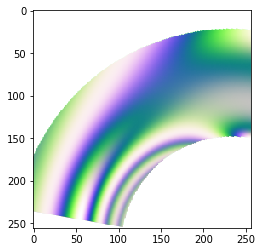

In [23]:
im = np.load(m7 + c[13] + 'FilteredStack1234Aug/' + 'FilteredStack1234Aug_M7' + '_C14' + '_' + str(400) + '.npy')
plt.imshow(im, cmap='gray')

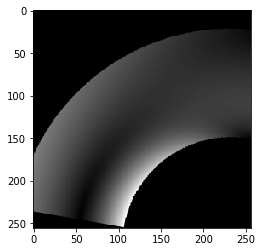

In [24]:
phase400 = np.loadtxt(mensulan + 'PN_400.txt')
plt.imshow(phase400, cmap='gray')

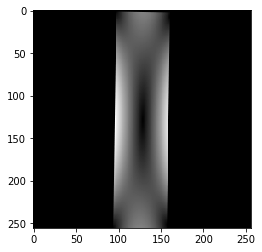

In [26]:
phase350 = np.loadtxt(vdn + 'PN_350.txt')
plt.imshow(phase350, cmap='gray')

## Recortes + canales variados

In [27]:
def disk_filter(url, rn):
    a1 = cv2.imread(url)[:,:,rn]
    for i in range(256):
        for j in range(256):
            if ((i-128)**2)+((j-128)**2) > (128)**2:
                a1[i,j] = 0    
    return a1

def ring_filter(url, rn):
    a1 = cv2.imread(url)[:,:,rn]
    for i in range(256):
        for j in range(256):
            value = ((i-128)**2)+((j-128)**2)
            if (value >= (126)**2) or (value < (64)**2):
                a1[i,j] = 0   
    return a1

def plate_filter(url, rn):
    a1 = cv2.imread(url)[:,:,rn]
    for i in range(256):
        for j in range(256):
            value = ((i-128)**2)+((j-128)**2)
            if (value < (26)**2):
                a1[i,j] = 0   
    return a1

def beam_filter(url, rn):
    a1 = cv2.imread(url)[:,:,rn]
    for i in range(256):
        for j in range(256):
            if (i < 96 or i > 159):
                a1[i,j] = 0   
    return a1

def vertical_filter(url, rn):
    a1 = cv2.imread(url)[:,:,rn]
    for i in range(256):
        for j in range(256):
            if (j < 96 or j > 160):
                a1[i,j] = 0 
    return a1

def mensula_filter(url, rn):
    a1 = cv2.imread(url)[:,:,rn]
    for i in range(256):
        for j in range(256):
            value = ((i)**2)+((j)**2)
            if (value >= (256)**2) or (value <= (128)**2):
                a1[i,j] = 0
    return a1

def muesca_filter(url, rn):
    a1 = cv2.imread(url)[:,:,rn]
    for i in range(256): #filas
        for j in range(256): #columnas
            value1 = (j + 1.77*(i-130) - 126)
            value2 = (j - 1.67*(i-129) - 129)
            if (value1 < 0) and (value2 < 0):
                    a1[i,j] = 0
    return a1

def get_filter(m, url, rn):
    if 'Disco' in m:
        return disk_filter(url, rn)
    elif 'Anillo' in m:
        return ring_filter(url, rn)
    elif 'Placa' in m:
        return plate_filter(url, rn)
    elif 'Viga' in m:
        return beam_filter(url, rn)
    elif 'Vertical' in m:
        return vertical_filter(url, rn)
    elif 'Mensula' in m:
        return mensula_filter(url, rn)
    elif 'Muesca' in m:
        return muesca_filter(url, rn)

In [30]:
m = m8
z = c[0] #Recorrer cada una de las 18 combinaciones de cámara e iluminación para cada modelo
## Normalización de la imagen a partir del valor máximo encontrado en el stack de mayor carga
rn = random.choice([0, 2])
b1 = get_filter(m, m + z + i1 + 'Img1_' + '100.bmp', rn)    #Imagen 1
b2 = get_filter(m, m + z + i2 + 'Img2_' + '100.bmp', rn)    #Imagen 2
b3 = get_filter(m, m + z + i3 + 'Img3_' + '100.bmp', rn)    #Imagen 3
b4 = get_filter(m, m + z + i4 + 'Img4_' + '100.bmp', rn)    #Imagen 4
b5 = np.dstack([b1, b2, b3, b4])
valor = np.amax(b5)

n= 50        #Recorrer cada una de las 100 imágenes de cada combinación, tomando el canal G del espacio RGB                
a1 = get_filter(m, m + z + i1 + 'Img1_' + str(n) + '.bmp', rn)    #Imagen 1
a2 = get_filter(m, m + z + i2 + 'Img2_' + str(n) + '.bmp', rn)    #Imagen 2
a3 = get_filter(m, m + z + i3 + 'Img3_' + str(n) + '.bmp', rn)    #Imagen 3
a4 = get_filter(m, m + z + i4 + 'Img4_' + str(n) + '.bmp', rn)    #Imagen 4
a5 = np.dstack([a1, a2, a3, a4])                     # Concatenación por medio de stack
a5 = a5/valor                                # Normalización por valor máximo

#Recortar una imagen
imageOut = a5[128:,128:]
cv2.imshow('Imagen de entrada',a5)
cv2.imshow('Imagen de salida',imageOut)
cv2.waitKey(0)
cv2.destroyAllWindows()

#np.save(m + z + 'FilteredStack1234Aug/' + 'FilteredStack1234Aug_M' + str(mm.index(m)+1) + '_C' + str(cs[c.index(z)]) +  '_' + str(300+n) + '.npy', imageOut) #Guardar stack

In [31]:
imageOut.shape

(128, 128, 4)

In [111]:
p2 = cv2.resize(imageOut, (256,256), interpolation = cv2.INTER_LINEAR)

In [112]:
p2.shape

(256, 256, 4)

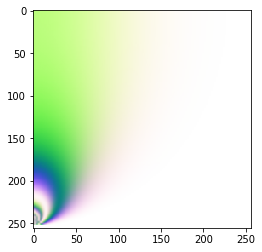

In [113]:
plt.imshow(p2)

In [32]:
ancho = 256 #columnas
alto = 256 # filas

for m in mm:                           #Recorrer cada uno de los 7 modelos
    print(m)
    for z in c:                        #Recorrer cada una de las 18 combinaciones de cámara e iluminación para cada modelo
        ## Normalización de la imagen a partir del valor máximo encontrado en el stack de mayor carga
        rn = random.choice([0, 2])
        b1 = get_filter(m, m + z + i1 + 'Img1_' + '100.bmp', rn)    #Imagen 1
        b2 = get_filter(m, m + z + i2 + 'Img2_' + '100.bmp', rn)    #Imagen 2
        b3 = get_filter(m, m + z + i3 + 'Img3_' + '100.bmp', rn)    #Imagen 3
        b4 = get_filter(m, m + z + i4 + 'Img4_' + '100.bmp', rn)    #Imagen 4
        b5 = np.dstack([b1, b2, b3, b4])
        valor = np.amax(b5)
        
        for n in range(1, 26):        #Recorrer cada una de las 100 imágenes de cada combinación, tomando el canal G del espacio RGB                
            i90 = get_filter(m, m + z + i1 + 'Img1_' + str(n) + '.bmp', rn)    #Imagen 1
            i45 = get_filter(m, m + z + i2 + 'Img2_' + str(n) + '.bmp', rn)    #Imagen 2
            i135 = get_filter(m, m + z + i3 + 'Img3_' + str(n) + '.bmp', rn)    #Imagen 3
            i0 = get_filter(m, m + z + i4 + 'Img4_' + str(n) + '.bmp', rn)    #Imagen 4
            #s0 = 0.5*(i0 + i90 + i45 + i135)
            #s1 = i0 - i90
            #s2 = i45 - i135
            #s = np.dstack([s0, s1, s2])                     # Concatenación por medio de stack
            a5 = np.dstack([i90, i45, i135, i0])
            a5 = a5/valor                                # Normalización por valor máximo
            
            #Recortar una imagen
            imageOut = a5[0:128,0:128]
            imageOut = cv2.resize(imageOut, (256,256), interpolation = cv2.INTER_LINEAR)
            np.save(m + z + 'FilteredStack1234Aug/' + 'FilteredStack1234Aug_M' + str(mm.index(m)+6) + '_C' + str(c.index(z)+1) +  '_' + str(400+n) + '.npy', imageOut) #Guardar stack
        
        for n in range(26, 51):        #Recorrer cada una de las 100 imágenes de cada combinación, tomando el canal G del espacio RGB                
            i90 = get_filter(m, m + z + i1 + 'Img1_' + str(n) + '.bmp', rn)    #Imagen 1
            i45 = get_filter(m, m + z + i2 + 'Img2_' + str(n) + '.bmp', rn)    #Imagen 2
            i135 = get_filter(m, m + z + i3 + 'Img3_' + str(n) + '.bmp', rn)    #Imagen 3
            i0 = get_filter(m, m + z + i4 + 'Img4_' + str(n) + '.bmp', rn)    #Imagen 4
            #s0 = 0.5*(i0 + i90 + i45 + i135)
            #s1 = i0 - i90
            #s2 = i45 - i135
            #s = np.dstack([s0, s1, s2])                     # Concatenación por medio de stack
            #s = s/valor                                # Normalización por valor máximo
            a5 = np.dstack([i90, i45, i135, i0])
            a5 = a5/valor                                # Normalización por valor máximo
            
            #Recortar una imagen
            imageOut = a5[0:128,128:]
            imageOut = cv2.resize(imageOut, (256,256), interpolation = cv2.INTER_LINEAR)
            np.save(m + z + 'FilteredStack1234Aug/' + 'FilteredStack1234Aug_M' + str(mm.index(m)+6) + '_C' + str(c.index(z)+1) +  '_' + str(400+n) + '.npy', imageOut) #Guardar stack
        
        for n in range(51,76):        #Recorrer cada una de las 100 imágenes de cada combinación, tomando el canal G del espacio RGB                
            i90 = get_filter(m, m + z + i1 + 'Img1_' + str(n) + '.bmp', rn)    #Imagen 1
            i45 = get_filter(m, m + z + i2 + 'Img2_' + str(n) + '.bmp', rn)    #Imagen 2
            i135 = get_filter(m, m + z + i3 + 'Img3_' + str(n) + '.bmp', rn)    #Imagen 3
            i0 = get_filter(m, m + z + i4 + 'Img4_' + str(n) + '.bmp', rn)    #Imagen 4
            #s0 = 0.5*(i0 + i90 + i45 + i135)
            #s1 = i0 - i90
            #s2 = i45 - i135
            #s = np.dstack([s0, s1, s2])                     # Concatenación por medio de stack
            #s = s/valor                                # Normalización por valor máximo
            a5 = np.dstack([i90, i45, i135, i0])
            a5 = a5/valor                                # Normalización por valor máximo
            
            #Recortar una imagen
            imageOut = a5[128:,0:128]
            imageOut = cv2.resize(imageOut, (256,256), interpolation = cv2.INTER_LINEAR)
            np.save(m + z + 'FilteredStack1234Aug/' + 'FilteredStack1234Aug_M' + str(mm.index(m)+6) + '_C' + str(c.index(z)+1) +  '_' + str(400+n) + '.npy', imageOut) #Guardar stack
    
        for n in range(76, 101):        #Recorrer cada una de las 100 imágenes de cada combinación, tomando el canal G del espacio RGB                
            i90 = get_filter(m, m + z + i1 + 'Img1_' + str(n) + '.bmp', rn)    #Imagen 1
            i45 = get_filter(m, m + z + i2 + 'Img2_' + str(n) + '.bmp', rn)    #Imagen 2
            i135 = get_filter(m, m + z + i3 + 'Img3_' + str(n) + '.bmp', rn)    #Imagen 3
            i0 = get_filter(m, m + z + i4 + 'Img4_' + str(n) + '.bmp', rn)    #Imagen 4
            #s0 = 0.5*(i0 + i90 + i45 + i135)
            #s1 = i0 - i90
            #s2 = i45 - i135
            #s = np.dstack([s0, s1, s2])                     # Concatenación por medio de stack
            #s = s/valor                                # Normalización por valor máximo
            a5 = np.dstack([i90, i45, i135, i0])
            a5 = a5/valor                                # Normalización por valor máximo
            
            #Recortar una imagen
            imageOut = a5[128:,128:]
            imageOut = cv2.resize(imageOut, (256,256), interpolation = cv2.INTER_LINEAR)
            np.save(m + z + 'FilteredStack1234Aug/' + 'FilteredStack1234Aug_M' + str(mm.index(m)+6) + '_C' + str(c.index(z)+1) +  '_' + str(400+n) + '.npy', imageOut) #Guardar stack
        
        print(z)
    

    lim = 8 #Límite de normalización y de eliminación de ordenes de franjas superiores
    directorio = secuencias[mm.index(m)]
    mat = scipy.io.loadmat(directorio + 'Phase_T_100.mat')
    mat = mat['Phase_T']
    mat = mat/(2*np.pi)
    mat[mat > lim] = lim
    mat = mat/lim
    valor = np.amax(mat)
    
    for i in range(1,26):
        mat = scipy.io.loadmat(directorio + 'Phase_T_' + str(i) + '.mat')
        mat = mat['Phase_T']
        mat = mat/(2*np.pi)
        mat[mat > lim] = lim
        mat = mat/lim
        # Normalización
        mat = mat/valor
        
        #Recortar una imagen
        imageOut = mat[0:128,0:128]
        imageOut = cv2.resize(imageOut, (256,256), interpolation = cv2.INTER_LINEAR)
        np.savetxt(pns[secuencias.index(directorio)] + 'PN_' + str(i+400) + '.txt', imageOut)
    
    for i in range(26, 51):
        mat = scipy.io.loadmat(directorio + 'Phase_T_' + str(i) + '.mat')
        mat = mat['Phase_T']
        mat = mat/(2*np.pi)
        mat[mat > lim] = lim
        mat = mat/lim
        # Normalización
        mat = mat/valor
        
        #Recortar una imagen
        imageOut = mat[0:128,128:]
        imageOut = cv2.resize(imageOut, (256,256), interpolation = cv2.INTER_LINEAR)
        np.savetxt(pns[secuencias.index(directorio)] + 'PN_' + str(i+400) + '.txt', imageOut)
        
    for i in range(51,76):
        mat = scipy.io.loadmat(directorio + 'Phase_T_' + str(i) + '.mat')
        mat = mat['Phase_T']
        mat = mat/(2*np.pi)
        mat[mat > lim] = lim
        mat = mat/lim
        # Normalización
        mat = mat/valor
        
        #Recortar una imagen
        imageOut = mat[128:,0:128]
        imageOut = cv2.resize(imageOut, (256,256), interpolation = cv2.INTER_LINEAR)
        np.savetxt(pns[secuencias.index(directorio)] + 'PN_' + str(i+400) + '.txt', imageOut)
        
    for i in range(76, 101):
        mat = scipy.io.loadmat(directorio + 'Phase_T_' + str(i) + '.mat')
        mat = mat['Phase_T']
        mat = mat/(2*np.pi)
        mat[mat > lim] = lim
        mat = mat/lim
        # Normalización
        mat = mat/valor
        
        #Recortar una imagen
        imageOut = mat[128:,128:]
        imageOut = cv2.resize(imageOut, (256,256), interpolation = cv2.INTER_LINEAR)
        np.savetxt(pns[secuencias.index(directorio)] + 'PN_' + str(i+400) + '.txt', imageOut)

Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/
Concord_IMX250MYR_No_correccion/
Concord_IMX250MZR_No_correccion/
DL11_IMX250MYR_No_correccion/
DL11_IMX250MZR_No_correccion/
Fluorescente_IMX250MYR_No_correccion/
Fluorescente_IMX250MZR_No_correccion/
LCD_IMX250MYR_No_correccion/
LCD_IMX250MZR_No_correccion/
Philips_IMX250MYR_No_correccion/
Philips_IMX250MZR_No_correccion/
RXD2_IMX250MYR_No_correccion/
RXD2_IMX250MZR_No_correccion/
Sylvania_IMX250MYR_No_correccion/
Sylvania_IMX250MZR_No_correccion/
Toshiba_IMX250MYR_No_correccion/
Toshiba_IMX250MZR_No_correccion/
Willard_IMX250MYR_No_correccion/
Willard_IMX250MZR_No_correccion/
Coleccion/Mensula__Carga_Lineal_100000N__100_frames__256_Resolucion/Imagenes/
Concord_IMX250MYR_No_correccion/
Concord_IMX250MZR_No_correccion/
DL11_IMX250MYR_No_correccion/
DL11_IMX250MZR_No_correccion/
Fluorescente_IMX250MYR_No_correccion/
Fluorescente_IMX250MZR_No_correccion/
LCD_IMX250MYR_No_correccion/
LCD_IMX250MZR_No_

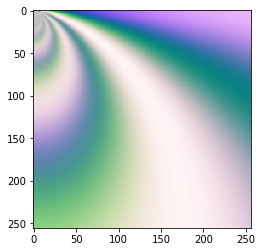

In [50]:
im = np.load(m8 + c[0] + 'FilteredStack1234Aug/' + 'FilteredStack1234Aug_M8' + '_C1' + '_' + str(500) + '.npy')
plt.imshow(im, cmap='gray')

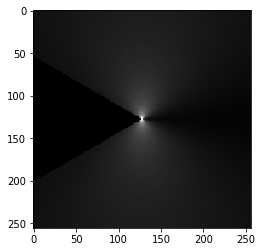

In [6]:
phase500 = np.loadtxt(muescan + 'PN_10.txt')
plt.imshow(phase500, cmap='gray')